In [2]:
import networkx as nx
import pickle
import numpy as np

from pathlib import Path
import pandas as pd
import os

import sys
sys.path.append("../src")
from data_component import DataComponent
from graph_utils import *


In [2]:
# Read graph and opinions
data = DataComponent(real_data="Brexit")
opinions = data.get_opinions()
G_brexit = data.get_graph()

Loading follow graph ..
Graph loaded  ✅
|V|=7_589 |E|=532_459 node types={'int'}


In [3]:
opinions

array([0.5  , 0.   , 0.   , ..., 0.   , 0.625, 1.   ])

0.5483296179151699 0.0 1.0


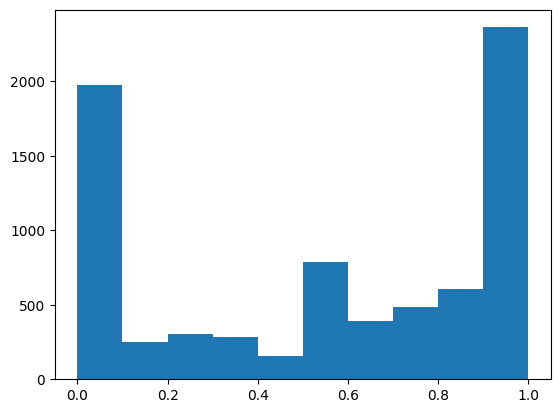

In [4]:
print(np.mean(opinions), np.min(opinions), np.max(opinions))
plt.figure()
plt.hist(opinions)
plt.show()

In [5]:
# Remove edges to obtain a "reduced" version of the raw graph (no edges between nodes with opposing stance)
edges_to_remove = []
gaps = []
edges = G_brexit.edges()
for edge in edges:
    i, j = edge
    if i == j:
        continue
    gaps.append(abs(opinions[i]-opinions[j]))
    if (not (opinions[i] >= 0.5 and opinions[j] >= 0.5)) and (not (opinions[i] < 0.5 and opinions[j] < 0.5)):
        edges_to_remove.append(edge)
        
G_brexit_reduced = G_brexit.copy()
G_brexit_reduced.remove_edges_from(edges_to_remove)
print("Proportion of edges removed:", len(edges_to_remove)/len(edges))


Proportion of edges removed: 0.28203110474233695


In [6]:
print(f"|V| in Reduced Graph: {G_brexit_reduced.number_of_nodes()}")
print(f"|E| in Reduced Graph: {G_brexit_reduced.number_of_edges()}")

|V| in Reduced Graph: 7589
|E| in Reduced Graph: 382289


In [7]:
# Function definition
import networkx as nx
import community as community_louvain
import numpy as np
from collections import defaultdict

def get_communities(G, min_community_size=100):
    # Compute the best partition using Louvain method on graph G
    partition = community_louvain.best_partition(nx.Graph(G), random_state=42)  
    
    # Initialize dictionaries to store results
    community_nodes_count = defaultdict(int)
    community_opinion_avg = {}

    # Calculate the number of nodes in each community and their average opinion
    for node, comm in partition.items():
        community_nodes_count[comm] += 1
        if comm not in community_opinion_avg:
            community_opinion_avg[comm] = []
        community_opinion_avg[comm].append(opinions[node])

    # Calculate average opinions and filter communities
    large_communities = {comm: nodes for comm, nodes in community_nodes_count.items() if nodes >= min_community_size}

    return large_communities, partition, community_opinion_avg    

In [8]:
large_communities, partition, community_opinion_avg = get_communities(G_brexit_reduced, min_community_size=100)

In [9]:
large_communities

{0: 3095, 3: 2894, 2: 1341}

In [10]:
partition

{0: 0,
 5294: 0,
 6849: 3,
 1666: 0,
 7118: 0,
 2310: 3,
 3787: 0,
 1562: 0,
 1645: 0,
 5619: 0,
 3030: 0,
 159: 0,
 418: 0,
 2194: 0,
 2776: 0,
 515: 0,
 2741: 0,
 6587: 0,
 3921: 0,
 6737: 0,
 6330: 0,
 1788: 2,
 2484: 0,
 812: 0,
 7323: 0,
 3265: 0,
 1928: 0,
 825: 0,
 5581: 0,
 1220: 3,
 5013: 0,
 407: 0,
 4964: 0,
 2889: 0,
 3709: 0,
 6816: 0,
 1070: 0,
 4500: 0,
 2288: 0,
 5241: 0,
 124: 0,
 2003: 0,
 5950: 0,
 1620: 0,
 2508: 0,
 4327: 0,
 3547: 0,
 4302: 0,
 5807: 3,
 6639: 3,
 4357: 0,
 2356: 0,
 2929: 0,
 4434: 0,
 6508: 3,
 344: 0,
 5743: 0,
 1926: 3,
 17: 0,
 4843: 0,
 4886: 3,
 4308: 0,
 1200: 0,
 3696: 0,
 3539: 0,
 269: 0,
 2625: 0,
 6976: 0,
 5417: 0,
 5060: 0,
 2360: 0,
 4440: 0,
 6554: 0,
 6680: 0,
 7575: 0,
 6616: 3,
 4021: 0,
 2715: 0,
 5931: 0,
 2147: 0,
 1774: 0,
 3314: 3,
 135: 0,
 2577: 0,
 31: 3,
 5109: 3,
 909: 0,
 6694: 0,
 3275: 0,
 2656: 3,
 280: 0,
 4937: 0,
 2434: 3,
 3846: 0,
 2801: 0,
 4510: 3,
 5115: 0,
 4608: 0,
 3525: 0,
 3637: 0,
 966: 0,
 2501: 0,


In [11]:
community_opinion_avg

{0: [0.5,
  1.0,
  0.8888888888888888,
  0.75,
  0.8181818181818181,
  0.7428571428571429,
  0.85,
  0.8571428571428572,
  0.6666666666666666,
  0.9333333333333333,
  0.890625,
  1.0,
  0.8823529411764706,
  0.7894736842105263,
  0.5,
  0.625,
  0.875,
  1.0,
  1.0,
  1.0,
  1.0,
  0.75,
  0.8064516129032258,
  0.75,
  1.0,
  1.0,
  0.8666666666666667,
  0.75,
  0.6666666666666666,
  0.71875,
  1.0,
  1.0,
  0.5,
  1.0,
  1.0,
  1.0,
  0.5,
  0.8571428571428572,
  1.0,
  0.8623853211009174,
  0.8333333333333333,
  0.7826086956521738,
  0.8275862068965517,
  0.7142857142857143,
  0.7857142857142857,
  0.6666666666666666,
  0.6666666666666666,
  0.5384615384615384,
  1.0,
  0.8522727272727273,
  0.8235294117647058,
  1.0,
  1.0,
  0.5714285714285714,
  0.7931034482758621,
  1.0,
  0.8461538461538461,
  0.8,
  1.0,
  0.6666666666666666,
  0.75,
  0.75,
  1.0,
  0.9491833030852994,
  0.75,
  0.8368794326241135,
  0.8611111111111112,
  0.7619047619047619,
  0.8709677419354839,
  0.733333333

In [12]:
from operator import itemgetter

In [13]:
large_communities_ids = list(large_communities.keys())
large_community_opinion_avg = itemgetter(*large_communities_ids)(community_opinion_avg)

Community 0


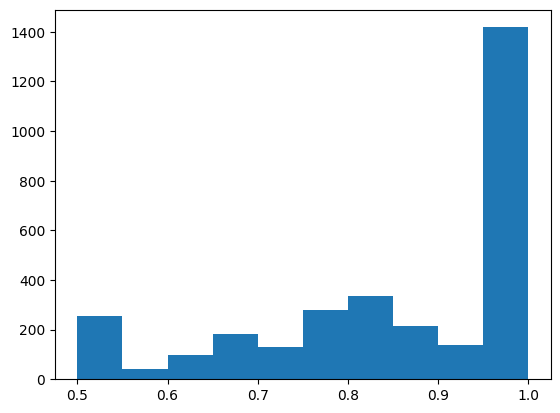

Community 3


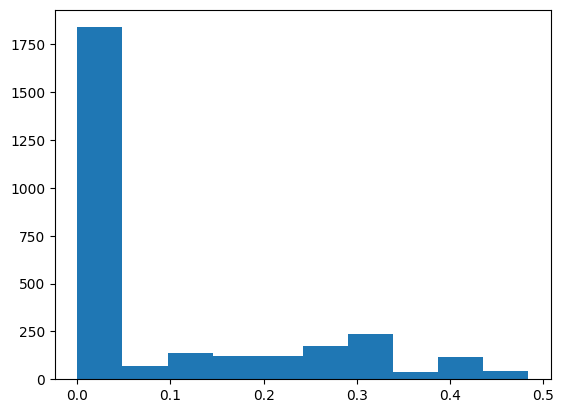

Community 2


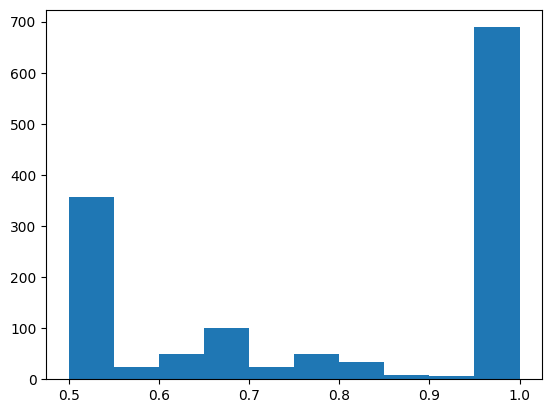

In [14]:
for i, opinion_avg in enumerate(large_community_opinion_avg):
    print("Community", large_communities_ids[i]) 
    plt.figure()
    plt.hist(opinion_avg)
    plt.show()

In [15]:
large_communities_ids[2]

2

Community 0
3095
209764


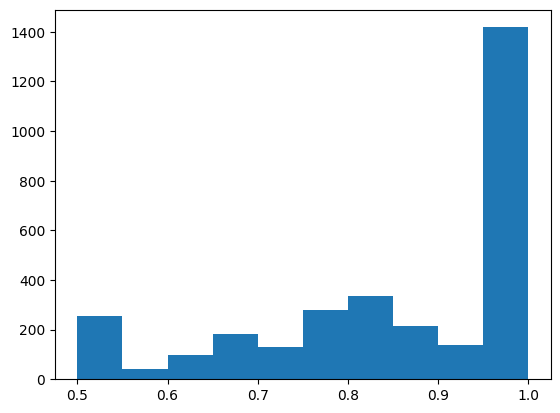

Community 3
2894
121325


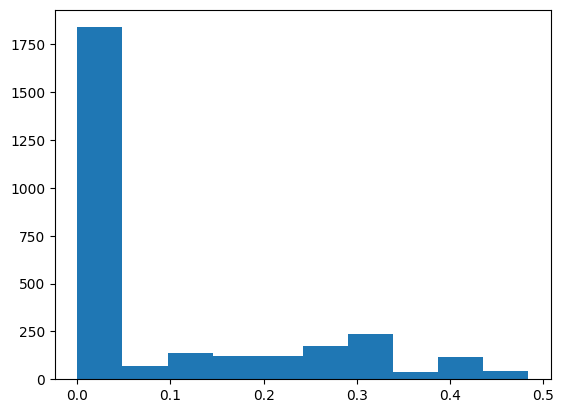

Community 2
1341
31707


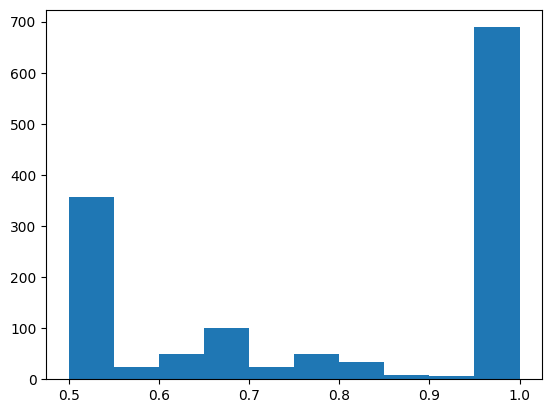

In [16]:
for community_id in large_communities_ids:
    community_nodes = [k for k, v in partition.items() if v == community_id]
    print("Community", community_id) 

    graph_community = G_brexit_reduced.subgraph(community_nodes)
    community_opinions = opinions[list(graph_community.nodes())]

    print(graph_community.number_of_nodes())
    print(graph_community.number_of_edges())
    
    plt.figure()
    plt.hist(community_opinions)
    plt.show()

In [18]:
max(list(G_brexit_reduced.nodes()))

7588

## Isolating Community 0 (skewed on positive) and Community 3 (skewed on negative)

In [19]:
large_communities

{0: 3095, 3: 2894, 2: 1341}

In [20]:
# Community 0
positive_community_nodes = [k for k, v in partition.items() if v == 0]

In [21]:
len(positive_community_nodes)

3095

In [22]:
# Community 3
negative_community_nodes = [k for k, v in partition.items() if v == 3]

In [23]:
len(negative_community_nodes)

2894

In [24]:
positive_G_brexit_reduced = G_brexit_reduced.subgraph(positive_community_nodes)
negative_G_brexit_reduced = G_brexit_reduced.subgraph(negative_community_nodes)

In [25]:
nx.write_edgelist(positive_G_brexit_reduced, sys.path[-1] + "/../data/processed/positive_community_graph_reduced.npy")
nx.write_edgelist(negative_G_brexit_reduced, sys.path[-1] + "/../data/processed/negative_community_graph_reduced.npy")

In [26]:
a = nx.read_edgelist(sys.path[-1] + "/../data/processed/positive_community_graph_reduced.npy", create_using=nx.DiGraph, edgetype=int, nodetype=int)

In [27]:
a.number_of_nodes()

3095

In [70]:
edges_positive_G_brexit_reduced = positive_G_brexit_reduced.edges()
positive_inverse_count = 0
for edge in edges_positive_G_brexit_reduced:
    i, j = edge
    if positive_G_brexit_reduced.has_edge(j, i):
        positive_inverse_count += 1

In [71]:
positive_G_brexit_reduced.number_of_edges()

209764

In [72]:
positive_inverse_count

129946

In [73]:
edges_negative_G_brexit_reduced = negative_G_brexit_reduced.edges()
negative_inverse_count = 0
for edge in edges_negative_G_brexit_reduced:
    i, j = edge
    if negative_G_brexit_reduced.has_edge(j, i):
        negative_inverse_count += 1

In [74]:
negative_G_brexit_reduced.number_of_edges()

121325

In [75]:
negative_inverse_count

71144

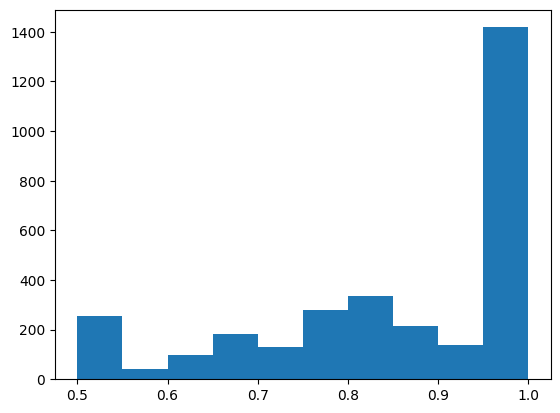

In [28]:
plt.figure()
plt.hist(opinions[list(a.nodes())])
plt.show()

In [29]:
print(f"|V| in Positive Reduced Graph: {positive_G_brexit_reduced.number_of_nodes()}")
print(f"|E| in Positive Reduced Graph: {positive_G_brexit_reduced.number_of_edges()}")

|V| in Positive Reduced Graph: 3095
|E| in Positive Reduced Graph: 209764


In [30]:
print(f"|V| in Negative Reduced Graph: {negative_G_brexit_reduced.number_of_nodes()}")
print(f"|E| in Negative Reduced Graph: {negative_G_brexit_reduced.number_of_edges()}")

|V| in Negative Reduced Graph: 2894
|E| in Negative Reduced Graph: 121325


# Loading Community Subgraphs

## Positive (Community 0)

In [3]:
positive_community_data = DataComponent(real_data="Brexit-positive")
positive_opinions = positive_community_data.get_opinions()
positive_G_brexit_reduced = positive_community_data.get_graph()

Loading follow graph ..
Retrieving the positive community from the reduced graph
Graph loaded  ✅
|V|=3_095 |E|=209_764 node types={'int'}


In [32]:
# positive_clustering = nx.clustering(positive_G_brexit_reduced)

In [4]:
print(f"|V| in Positive Reduced Graph: {positive_G_brexit_reduced.number_of_nodes()}")
print(f"|E| in Positive Reduced Graph: {positive_G_brexit_reduced.number_of_edges()}")
print(f"Density in Positive Reduced Graph: {nx.density(positive_G_brexit_reduced)}")
# print(f"Avg Clustering Coefficient in Positive Reduced Graph: {np.mean(list(positive_clustering.values()))}")

|V| in Positive Reduced Graph: 3095
|E| in Positive Reduced Graph: 209764
Density in Positive Reduced Graph: 0.021905339742458434


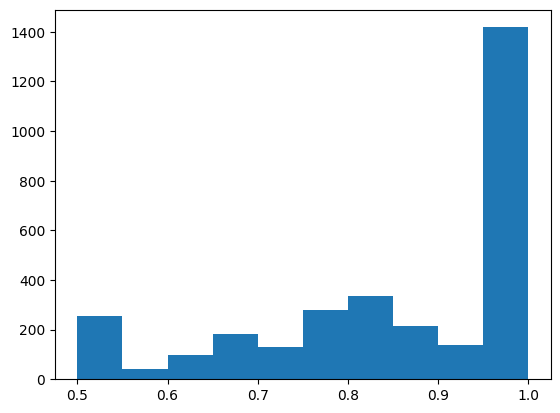

In [5]:
plt.figure()
plt.hist(positive_opinions)
plt.show()

In [14]:
degree_positive_community = dict(positive_G_brexit_reduced.out_degree())
reverse_degree_positive_community = dict(positive_G_brexit_reduced.reverse().out_degree())

In [96]:
a, b = np.unique(list(degree_positive_community.values()), return_counts=True)
reverse_a, reverse_b = np.unique(list(reverse_degree_positive_community.values()), return_counts=True)

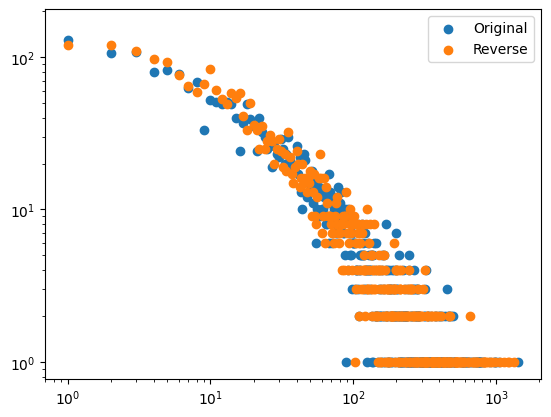

In [99]:
plt.figure()
plt.scatter(x=a, y=b, label="Original")
plt.scatter(x=reverse_a, y=reverse_b, label="Reverse")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

In [15]:
node_lowest_degree_positive_community = min((node for node in positive_G_brexit_reduced.nodes() if degree_positive_community[node] > 1), key=lambda node: degree_positive_community[node], default=None)
node_highest_degree_positive_community = max((node for node in positive_G_brexit_reduced.nodes()), key=lambda node: degree_positive_community[node], default=None)

In [16]:
print("Node with lowest out-degree in positive subgraph:", node_lowest_degree_positive_community)
print("Node with highest out-degree in positive subgraph:", node_highest_degree_positive_community)

Node with lowest out-degree in positive subgraph: 6587
Node with highest out-degree in positive subgraph: 3638


In [17]:
print(degree_positive_community[node_lowest_degree_positive_community])
print(degree_positive_community[node_highest_degree_positive_community])

2
1429


In [18]:
positive_centrality = nx.betweenness_centrality(positive_G_brexit_reduced)

In [19]:
node_lowest_centrality_positive_community = min(list(positive_G_brexit_reduced.nodes()), key=lambda node: positive_centrality[node])
node_highest_centrality_positive_community = max(list(positive_G_brexit_reduced.nodes()), key=lambda node: positive_centrality[node])

In [20]:
print("Node with lowest centrality in positive subgraph:", node_lowest_centrality_positive_community)
print("Node with highest centrality in positive subgraph:", node_highest_centrality_positive_community)

Node with lowest centrality in positive subgraph: 5834
Node with highest centrality in positive subgraph: 3638


In [21]:
print(positive_centrality[node_lowest_centrality_positive_community])
print(positive_centrality[node_highest_centrality_positive_community])

0.0
0.062051040076672274


## Negative (Community 3)

In [5]:
negative_community_data = DataComponent(real_data="Brexit-negative")
negative_opinions = negative_community_data.get_opinions()
negative_G_brexit_reduced = negative_community_data.get_graph()

Loading follow graph ..
Retrieving the negative community from the reduced graph
Graph loaded  ✅
|V|=2_894 |E|=121_325 node types={'int'}


In [8]:
negative_community_data.G.number_of_edges()

121325

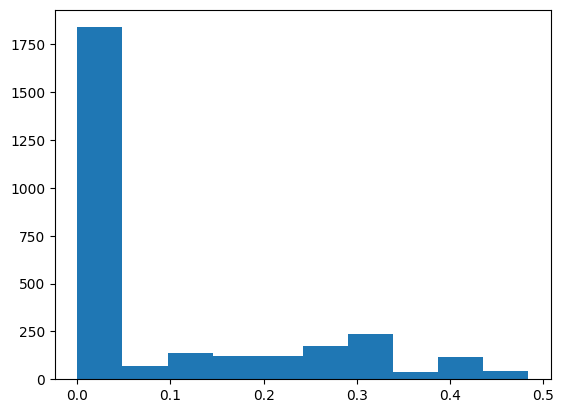

In [9]:
plt.figure()
plt.hist(negative_opinions)
plt.show()

In [58]:
# negative_clustering = nx.clustering(negative_G_brexit_reduced)

In [46]:
print(f"|V| in Positive Reduced Graph: {negative_G_brexit_reduced.number_of_nodes()}")
print(f"|E| in Positive Reduced Graph: {negative_G_brexit_reduced.number_of_edges()}")
print(f"Density in Negative Reduced Graph: {nx.density(negative_G_brexit_reduced)}")
# print(f"Avg Clustering Coefficient in Negative Reduced Graph: {np.mean(list(negative_clustering.values()))}")

|V| in Positive Reduced Graph: 2894
|E| in Positive Reduced Graph: 121325
Density in Negative Reduced Graph: 0.014491166271038617


In [10]:
degree_negative_community = dict(negative_G_brexit_reduced.out_degree())
reverse_degree_negative_community = dict(negative_G_brexit_reduced.reverse().out_degree())

In [92]:
a, b = np.unique(list(degree_negative_community.values()), return_counts=True)
reverse_a, reverse_b = np.unique(list(reverse_degree_negative_community.values()), return_counts=True)

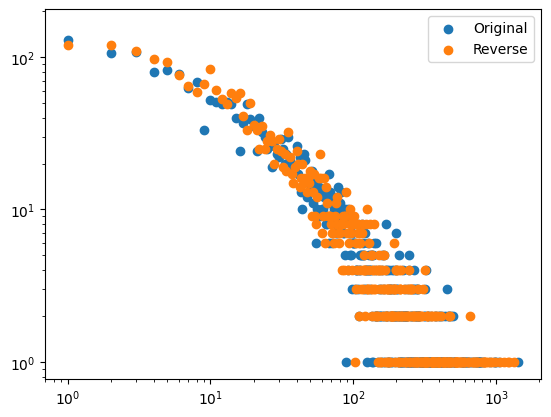

In [100]:
plt.figure()
plt.scatter(x=a, y=b, label="Original")
plt.scatter(x=reverse_a, y=reverse_b, label="Reverse")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

In [11]:
node_lowest_degree_negative_community = min((node for node in negative_G_brexit_reduced.nodes() if degree_negative_community[node] > 1), key=lambda node: degree_negative_community[node], default=None)
node_highest_degree_negative_community = max((node for node in negative_G_brexit_reduced.nodes()), key=lambda node: degree_negative_community[node], default=None)

In [12]:
print("Node with lowest out-degree in negative subgraph:", node_lowest_degree_negative_community)
print("Node with highest out-degree in negative subgraph:", node_highest_degree_negative_community)

Node with lowest out-degree in negative subgraph: 5454
Node with highest out-degree in negative subgraph: 987


In [102]:
degree_negative_community[987]

1438

In [12]:
negative_opinions[x_node]

0.0

In [15]:
from operator import itemgetter

In [11]:
x_node = 987

In [13]:
x_neighbors = list(negative_G_brexit_reduced.neighbors(x_node))

In [16]:
x_neighbors_opinions = itemgetter(*x_neighbors)(negative_community_data.opinions)

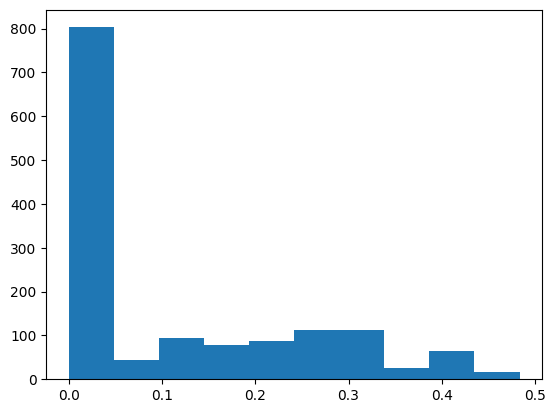

In [117]:
plt.figure()
plt.hist(x_neighbors_opinions)
plt.show()

In [6]:
negative_centrality = nx.betweenness_centrality(negative_G_brexit_reduced)

In [7]:
node_lowest_centrality_negative_community = min(list(negative_G_brexit_reduced.nodes()), key=lambda node: negative_centrality[node])
node_highest_centrality_negative_community = max(list(negative_G_brexit_reduced.nodes()), key=lambda node: negative_centrality[node])

In [8]:
print(negative_centrality[node_lowest_centrality_negative_community])
print(negative_centrality[node_highest_centrality_negative_community])

0.0
0.052040117770323746


In [25]:
node_highest_centrality_negative_community

6483

In [22]:
community_position_llm_node_dict = {'positive-low-degree': node_lowest_degree_positive_community,
                                    'positive-high-degree': node_highest_degree_positive_community,
                                    'negative-low-degree': node_lowest_degree_negative_community,
                                    'negative-high-degree': node_highest_degree_negative_community,
                                    'positive-low-centrality': node_lowest_centrality_positive_community,
                                    'positive-high-centrality': node_highest_centrality_positive_community,
                                    'negative-low-centrality': node_lowest_centrality_negative_community,
                                    'negative-high-centrality': node_highest_centrality_negative_community,
                                   }

In [23]:
community_position_llm_node_dict

{'positive-low-degree': 6587,
 'positive-high-degree': 3638,
 'negative-low-degree': 5454,
 'negative-high-degree': 987,
 'positive-low-centrality': 5834,
 'positive-high-centrality': 3638,
 'negative-low-centrality': 1594,
 'negative-high-centrality': 6483}

In [26]:
community_position_dict_path = sys.path[-1] + "/../data/processed/community_brexit_position_dict.pkl"

In [27]:
with open(community_position_dict_path, "wb") as f:
    pickle.dump(community_position_llm_node_dict, f)

In [75]:

def analyze_communities(large_communities, partition, community_opinion_avg, G_raw, opinions, position_type, min_community_size=100):
    
    community_avg_opinions = {comm: np.mean(community_opinion_avg[comm]) for comm in large_communities.keys()}

    # Identify the community with the highest or lowest average opinion based on metric
    target_comm = None
    if position_type == "positive-central" or position_type == "positive-high-degree" or position_type == "positive-lowest-degree":
        target_comm = max(community_avg_opinions, key=community_avg_opinions.get)
    elif position_type == "negative-central" or position_type == "negative-high-degree" or position_type == "negative-lowest-degree":
        target_comm = min(community_avg_opinions, key=community_avg_opinions.get)

    # Get the nodes in the target community
    nodes_in_target_comm = [node for node, community in partition.items() if community == target_comm]

    if position_type in ["positive-central", "negative-central"]:
        # Calculate centrality in G_raw
        centrality = nx.degree_centrality(G_raw)
    elif position_type in ["positive-high-degree", "negative-high-degree", "positive-lowest-degree", "negative-lowest-degree"]:
        # Calculate degree in G_raw
        centrality = dict(G_raw.degree(nodes_in_target_comm))

    # Identify the node with the highest or lowest centrality/degree
    target_node = None
    if position_type == "positive-lowest-degree" or position_type == "negative-lowest-degree":
        target_node = min((node for node in nodes_in_target_comm if centrality[node] > 1), key=lambda node: centrality[node], default=None)
    else:
        target_node = max(nodes_in_target_comm, key=lambda node: centrality[node])
    
    return target_node, community_avg_opinions

---

# Demo: choose a position type and observe the outcome

In [76]:
# Choose:
# "positive-central": i.e., MOST central in  the most positive community
# "negative-central": i.e., MOST central in  the most negative community
# "positive-high-degree": i.e., MAX out-degree in the most positive community
# "negative-high-degree": i.e., MAX out-degree in the most negative community
# "positive-lowest-degree": i.e., out-degree > 1
# "negative-lowest-degree": i.e., out-degree > 1

position_llm_node_dict = {}

position_types = ["positive-central", "negative-central", "positive-high-degree", "negative-high-degree", "positive-lowest-degree", "negative-lowest-degree"]
for position_type in position_types:
    nodeid, community_avg_opinions = analyze_communities(communities, partition, community_opinion_avg, G_brexit, opinions, position_type=position_type)
    print(f"Position: {position_type}\nNode: {nodeid}\nAvg opinions: {community_avg_opinions}")
    position_llm_node_dict[position_type] = nodeid

Position: positive-central
Node: 3638
Avg opinions: {0: 0.8565699737015398, 3: 0.09390009890120354, 4: 0.7998372334670752}
Position: negative-central
Node: 4426
Avg opinions: {0: 0.8565699737015398, 3: 0.09390009890120354, 4: 0.7998372334670752}
Position: positive-high-degree
Node: 3638
Avg opinions: {0: 0.8565699737015398, 3: 0.09390009890120354, 4: 0.7998372334670752}
Position: negative-high-degree
Node: 4426
Avg opinions: {0: 0.8565699737015398, 3: 0.09390009890120354, 4: 0.7998372334670752}
Position: positive-lowest-degree
Node: 7269
Avg opinions: {0: 0.8565699737015398, 3: 0.09390009890120354, 4: 0.7998372334670752}
Position: negative-lowest-degree
Node: 14
Avg opinions: {0: 0.8565699737015398, 3: 0.09390009890120354, 4: 0.7998372334670752}


In [34]:
position_dict_path = sys.path[-1] + "/../data/processed/brexit_position_dict.pkl"

In [35]:
position_dict_path

'../src/../data/processed/brexit_position_dict.pkl'

In [36]:
with open(position_dict_path, "wb") as f:
    pickle.dump(position_llm_node_dict, f)

In [13]:
nodeid

4426

In [14]:
communities

{2: 3121, 1: 2894, 3: 1337}

In [15]:
community_avg_opinions

{2: 0.8560817583522307, 1: 0.09390009890120354, 3: 0.799562257202405}

In [14]:
partition[nodeid] == 0

True